## This notebook discusses some basic plotting and data visualization techniques in Python.

### Now that we have covered how to load and manipulate tables, we can begin to think about analysis and data visualization.

### We first import the necessary packages:

In [1]:
# For reading data tables:
import pandas as pd

# For plotting.  Matplotlib is the main plotting package and Seaborn adds default "style" so the plots look a little better.
import matplotlib.pyplot as plt
import seaborn as sns

### Load the normalized expressions:

In [2]:
expressions = pd.read_csv('gene_expression.tsv', sep='\t', index_col=0)
expressions.head()

,SW1_Control,SW2_Control,SW3_Control,SW4_Treated,SW5_Treated,SW6_Treated
gene,,,,,,
DDX11L1,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000
WASH7P,45.77888,22.840605,42.016487,50.16839,29.507082,23.742158
MIR1302-10,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000
FAM138A,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000
OR4G4P,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000


### As shown in the other notebook, we will now filter for significantly upregulated genes.  If you need to review the details, look at the `numerical_python` notebook.

Our threshold for significance is log2FoldChange > 3 and adjusted p-value < 0.01

In [3]:
# load the table of differential expression results:
dge_results = pd.read_csv('differential_results.csv', index_col=0)

# create filters for significance and upregulated:
sig_filter = dge_results['padj'] < 0.01
upreg_filter = dge_results['log2FoldChange'] > 3.0

# filter the differential expression results to keep only those significantly upregulated genes:
sig_upreg = dge_results.loc[sig_filter & upreg_filter]

# Now filter the expressions-- we will eventually use those to plot
top_hits = expressions.loc[sig_upreg.index]
top_hits

,SW1_Control,SW2_Control,SW3_Control,SW4_Treated,SW5_Treated,SW6_Treated
gene,,,,,,
TNFSF18,7.792150,5.191047,2.271161,41.209749,30.458923,54.409111
RP11-46A10.2,3.896075,13.496721,5.677904,49.272526,54.254957,85.076065
RP13-131K19.6,2.922056,1.038209,1.135581,17.021418,12.373937,23.742158
LIPH,25.324487,15.573140,14.762549,168.422452,204.645889,207.743880
SPATA18,3.896075,2.076419,1.135581,40.313885,28.555240,18.795875
ART3,0.000000,0.000000,0.000000,7.166913,15.229462,6.924796
MYOZ2,0.000000,1.038209,4.542323,14.333826,23.796034,16.817362
NSG2,0.974019,0.000000,0.000000,8.958641,19.036827,9.892566
MUC19,0.974019,3.114628,0.000000,22.396603,21.892351,13.849592


### Now, we would like to plot the expression of these genes as a boxplot like this.  The image below is saved, but we will go through the steps to recreate:

![](grouped_boxplot.png)

### The Seaborn package provides a lot of convenient plotting functions, but you first need to have the data in the proper format.  

You can also "manually" create the same plots using matplotlib (or other low-level plotting libraries), but plotting software is notorious for being difficult to get just right.  Each little item requires you to manually edit.  For instance, changing the axis labels, axis tick marks, etc.

To use the Seaborn boxplot, we have to reformat our table of top hits.  Seaborn expects a table in "long" format.  Instead of the `top_hits` table above, where each row corresponds to a single gene, Seaborn wants a table that looks like:

|            gene |    Condition |     value|
|---|---|---|
|        TNFSF18 | Control  | 7.792150|
|  RP11-46A10.2  |Control  | 3.896075|
|  RP13-131K19.6 | Control |  2.922056|
|           LIPH | Control | 25.324487|
|        SPATA18 | Control |  3.896075|
|...|...|...|
|        TNFSF18 | Treated  | 17.792150|
|  RP11-46A10.2  |Treated  | 23.896075|
|  RP13-131K19.6 | Treated |  22.922056|
|           LIPH | Treated | 125.324487|
|        SPATA18 | Treated |  13.896075|


### To do this, we will use Pandas `melt` function, which can turn our expression table into this long format. However, to successfully use `melt`, we first need to "move" that index of gene names into the actual table itself.  The `reset_index` function can do that for us:

In [4]:
top_hits = top_hits.reset_index()
top_hits

,gene,SW1_Control,SW2_Control,SW3_Control,SW4_Treated,SW5_Treated,SW6_Treated
0,TNFSF18,7.792150,5.191047,2.271161,41.209749,30.458923,54.409111
1,RP11-46A10.2,3.896075,13.496721,5.677904,49.272526,54.254957,85.076065
2,RP13-131K19.6,2.922056,1.038209,1.135581,17.021418,12.373937,23.742158
3,LIPH,25.324487,15.573140,14.762549,168.422452,204.645889,207.743880
4,SPATA18,3.896075,2.076419,1.135581,40.313885,28.555240,18.795875
5,ART3,0.000000,0.000000,0.000000,7.166913,15.229462,6.924796
6,MYOZ2,0.000000,1.038209,4.542323,14.333826,23.796034,16.817362
7,NSG2,0.974019,0.000000,0.000000,8.958641,19.036827,9.892566
8,MUC19,0.974019,3.114628,0.000000,22.396603,21.892351,13.849592
9,POSTN,3.896075,1.038209,4.542323,31.355244,58.062322,19.785131


### Now we can use melt

### Some of the functions can be difficult to understand-- even experienced programmers can easily read the documentation.  However, you can always make up some "test" data and play with it.  The documentation will often provide small useful examples to show how to use the functions.  Always check each step to make sure you are doing it properly.  Unlike some statistical methods where there may not be a single "correct" answer, you can usually tell if something is wrong when you are simply manipulating data.

In [5]:
melted = pd.melt(top_hits, id_vars='gene')
melted.head(20)

,gene,variable,value
0,TNFSF18,SW1_Control,7.792150
1,RP11-46A10.2,SW1_Control,3.896075
2,RP13-131K19.6,SW1_Control,2.922056
3,LIPH,SW1_Control,25.324487
4,SPATA18,SW1_Control,3.896075
5,ART3,SW1_Control,0.000000
6,MYOZ2,SW1_Control,0.000000
7,NSG2,SW1_Control,0.974019
8,MUC19,SW1_Control,0.974019
9,POSTN,SW1_Control,3.896075


### OK, that looks pretty good, but we need one more change.  In our plot, we want to show how the control samples compare with the treated.  

#### In the table above, we see that the "variable" column tells us the sample names, which **indirectly** tells us the experimental condition.  To use the boxplot function, we need a column that will tell us condition.

#### To do that, we will create a custom function which will return the biological condition given the sample name.  We will then "apply" that to the `variable` column.

In [6]:
def split_name(x):
    '''
    Used to extract the biological condition for each sample.
    If given 'SW1_Control', will return 'Control'
    '''
    return x.split('_')[1]

# the "apply" function takes that function we created above and runs it on every entry in the "variable" column.
melted['Condition'] = melted['variable'].apply(split_name)
melted.head(20)

,gene,variable,value,Condition
0,TNFSF18,SW1_Control,7.792150,Control
1,RP11-46A10.2,SW1_Control,3.896075,Control
2,RP13-131K19.6,SW1_Control,2.922056,Control
3,LIPH,SW1_Control,25.324487,Control
4,SPATA18,SW1_Control,3.896075,Control
5,ART3,SW1_Control,0.000000,Control
6,MYOZ2,SW1_Control,0.000000,Control
7,NSG2,SW1_Control,0.974019,Control
8,MUC19,SW1_Control,0.974019,Control
9,POSTN,SW1_Control,3.896075,Control


### Great!  Our data is ready for the plot.  Let's try it.

#### To use the `boxplot` function, we know we want the different genes to be on the horizontal (x) axis and we want to show the expressions on the vertical (y) axis.  Furthermore, `boxplot` provides the option to color each condition by using the `hue` argument.  

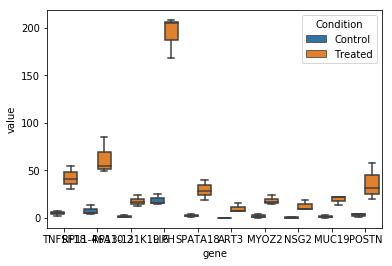

In [7]:
sns.boxplot(x='gene', y='value', hue='Condition', data=melted)

### OK, so it worked, but it's not ideal.

#### It clearly needs to be larger, but we can also edit some of the other elements of the plot, such as axis labels.  To make it larger, we essentially give the boxplot function a pre-sized "space" to draw into.

#### Below, we go step-by-step through creating an improved figure.

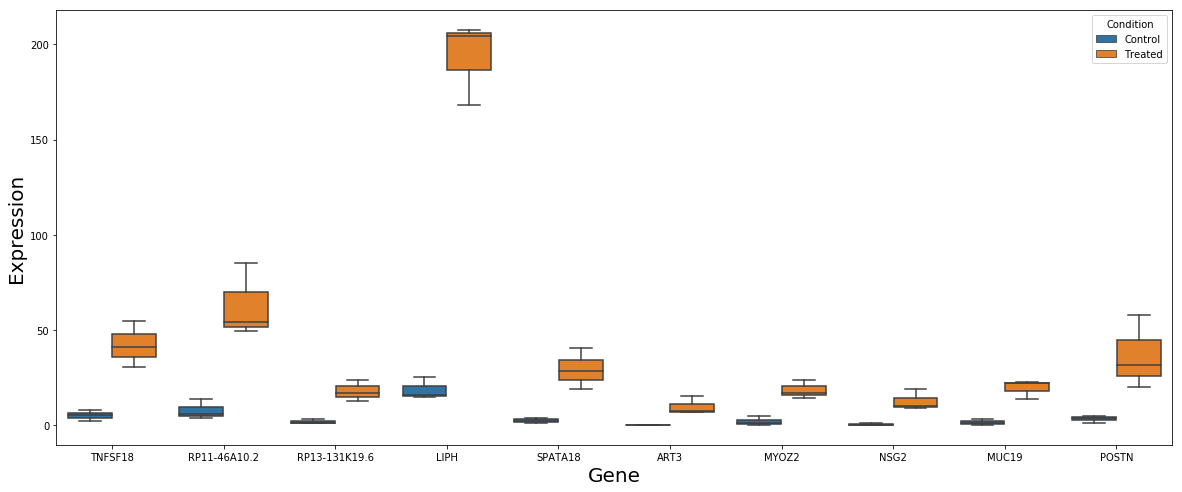

In [8]:
# Creates a new figure.  There are several ways to do this, but this creates a figure that is (20,8) so it will be wider than it is tall. 
fig = plt.figure(figsize=(20,8))

# Need to add a set of axes to the figure.  The "111" means we want the first set of axes in a 1x1 grid.  This is very common for simple plots  
# If you were placing two plots side-by-side and wanted the one on the right side, you would use 122 since you want 
# the second axes on a 1x2 grid
ax = fig.add_subplot(111)

# Now use Seaborn's boxplot, but note the ax=ax.  This way Seaborn draws inside the axes we just created
# If it is missing (as in our first attempt), Seaborn makes its own set of axes.
sns.boxplot(x='gene', y='value', hue='Condition', data=melted, ax=ax)

# We can edit the default axis labels and give them larger fonts:
ax.set_xlabel('Gene', fontsize=20)
ax.set_ylabel('Expression', fontsize=20)

# To see the plot below, we have to type this:
plt.show()

# You can save the plot if you like.
# The bbox_inches='tight' just trims the excess empty space around the plot.
fig.savefig('example_boxplot.png', bbox_inches='tight')

# Finally, tell Python you are done creating the plot.  Otherwise, extra memory will be used
# since Python will try to remember the details of the plot.
plt.close()

### There were a lot of steps there and it can seem a little daunting at first.  To give a little more guidance, I will step through the process so it is a little more obvious how one might accomplish a similar task.

1. #### To begin, we knew we wanted a boxplot.  The first step might be to search online for "Python boxplot".  
    - This returns a number of links to pages for matplotlib, Seaborn, and even Pandas.  Each one will typically show some examples-- choose the one you like best.
2. #### After selecting which plotting package, you can look at the documentation.  Above, we chose Seaborn's boxplot, which has documentation at https://seaborn.pydata.org/examples/grouped_boxplot.html

#### At that page is an example boxplot:

![](seaborn_boxplot.png)

#### In this plot, we are viewing how the total dining bill varies on each day, with the data separated by smokers and non-smokers.  For our plot, we want to show several genes and visualize how their expression varies between control and treated conditions.  

3. #### Under the boxplot, it provides a small snippet of code which demonstrates the usage:

```
import seaborn as sns
sns.set(style="ticks", palette="pastel")

# Load the example tips dataset
tips = sns.load_dataset("tips")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="day", y="total_bill",
            hue="smoker", palette=["m", "g"],
            data=tips)
sns.despine(offset=10, trim=True)
```

#### Note that to do any plotting, we obviously need some data to work with; Seaborn provides a few sample datasets which it uses throughout their documentation.  We can take a look at `tips`, which will tell us how we can format the data for the plot--

In [9]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


4. #### By comparing the image with the plotting function, we see the following:
    - The horizontal direction (x-axis) corresponds to the day, and we see the argument `x="day"` in the `boxplot` function.  We use `"day"` since it is the column header.
    - The values we are actually plotting come from the `total_bill` column, so we see the argument `y="total_bill"` in the `boxplot` function.
    - We see that the boxes are separated by whether the person was a smoker or not, which is given by the `smoker` column in `tips`.  Accordingly, we see them use `hue="smoker"`.
    - Finally, we tell `boxplot` that all this data comes from the `tips` dataframe.
    
5. #### The important thing to keep in mind is not the particulars of this `tips` data, etc.  The main idea is that we can use their example to "reverse-engineer" the important components of the plot, such as the format of the data.  We see that the data is arranged in this "long" format-- each variable we are plotting (`day`, `smoker`, `total_bill`) has its own column.  For most data, this is the format that is the most sensible.  For genomic data, like our expression matrix, the "long format" is actually a little awkward and non-intuitive.

6. #### At this point, we know *how* to plot, but the expression data is not yet in the correct format.  Therefore, our next task is determining how to reformat the expression matrix.
    - This is perhaps a little mysterious, since it is not obvious what you might initially search for.  This is just a matter of becoming familiar with the terminology in the field.
    - I could not remember the `melt` function, so I actually started by searching for "pivot tables", which is a way of summarizing/aggregating data in tables.  That eventually led me to recall the `melt` function.
    
7.  #### The examples at Pandas `melt` function (https://pandas.pydata.org/docs/reference/api/pandas.melt.html) shows some small examples which can help you on your way.  Don't be afraid to try things and make mistakes!

### Next, let's perform a hierarchical clustering of the samples and plot a dendrogram that looks like the static figure below:

![](dendrogram.png)

#### In our workshop, we know we have 3 samples in control and treated conditions.  Therefore, the clustering is fairly trivial and should ideally confirm this.  However, if we were looking for subtypes in a cancer study, we may want to cluster samples by their expression.  The analysis may reveal groups of samples that cluster closely suggesting possible biological mechanisms that are similar in those samples.

#### Again, we can illustrate how you can learn to do it yourself. 

Just like us, you can start with a simple Google (or other) search: "Python plot dendrogram"

The first link gives us: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html

The documentation can be a bit technical, but they are often accompanied by some basic usage examples.  We adapt their example here.

First import the necessary functions:

In [10]:
from scipy.cluster.hierarchy import linkage, dendrogram

#### From the documentation, we can see that `linkage` is responsible for the clustering, while `dendrogram` handles the plotting.  

#### In the documentation for `linkage`, it says that it needs:

    A condensed distance matrix. A condensed distance matrix is a flat array containing the upper triangular of the distance matrix. This is the form that pdist returns. 
    Alternatively, a collection of observation m vectors in n dimensions may be passed as an m-by-n array. 
    All elements of the condensed distance matrix must be finite, i.e. no NaNs or infs.
    
#### This is not the easiest thing to read, but in the data analysis field it is common to see references to "observations" and "features".  In our genomic context, an observation is a sample.  Each observation has a number of features, which are the 50,000+ gene expression values.  As another example, an observation can be a person and their features are height, weight, age, etc. Features can also be called variables or covariates.

#### The description above says that the `linkage` function wants the data as a m-by-n array, where $m$ is the number of observations.  By convention, the notation "m-by-n" means that there should be $m$ rows and $n$ columns.  Above, our expression table has the $m=6$ observations as *columns* not rows.  Therefore, we have to "turn" the data, which is called a transpose operation.  We do this by adding a `.T` (for example `expressions.T`)  

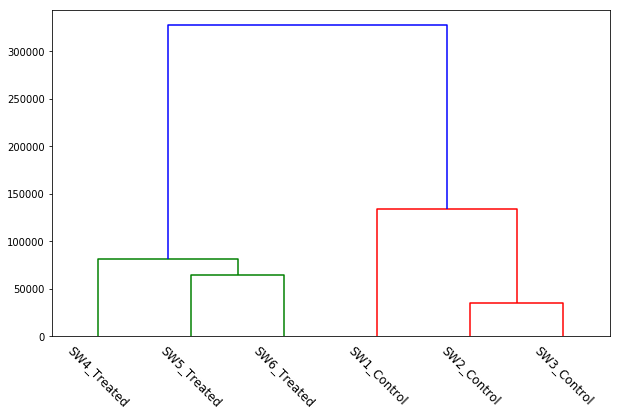

In [11]:
# this prepares the data for the dendrogram:
Z = linkage(expressions.T)

# as above, we give the dendrogram function a figure/axis to plot into:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

# plot the dendrogram using axis "ax", but also include the names of the samples (and turn them by 45 degrees)
d = dendrogram(Z, ax=ax, labels=expressions.columns, leaf_rotation=-45)
plt.show()

fig.savefig('dendrogram_example.png', bbox_inches='tight')
plt.close()

### Next let's plot a heatmap, helped by Seaborn:

Recall that earlier, to make the data work with Seaborn's `boxplot` function, we made the gene index as a column in the `top_hits` table:

In [12]:
top_hits.head()

,gene,SW1_Control,SW2_Control,SW3_Control,SW4_Treated,SW5_Treated,SW6_Treated
0,TNFSF18,7.792150,5.191047,2.271161,41.209749,30.458923,54.409111
1,RP11-46A10.2,3.896075,13.496721,5.677904,49.272526,54.254957,85.076065
2,RP13-131K19.6,2.922056,1.038209,1.135581,17.021418,12.373937,23.742158
3,LIPH,25.324487,15.573140,14.762549,168.422452,204.645889,207.743880
4,SPATA18,3.896075,2.076419,1.135581,40.313885,28.555240,18.795875


### When using the heatmap, having those gene names inside the table interferes with the plotting.  We need to restore the gene index:

In [13]:
top_hits = top_hits.set_index('gene')
top_hits.head()

,SW1_Control,SW2_Control,SW3_Control,SW4_Treated,SW5_Treated,SW6_Treated
gene,,,,,,
TNFSF18,7.792150,5.191047,2.271161,41.209749,30.458923,54.409111
RP11-46A10.2,3.896075,13.496721,5.677904,49.272526,54.254957,85.076065
RP13-131K19.6,2.922056,1.038209,1.135581,17.021418,12.373937,23.742158
LIPH,25.324487,15.573140,14.762549,168.422452,204.645889,207.743880
SPATA18,3.896075,2.076419,1.135581,40.313885,28.555240,18.795875


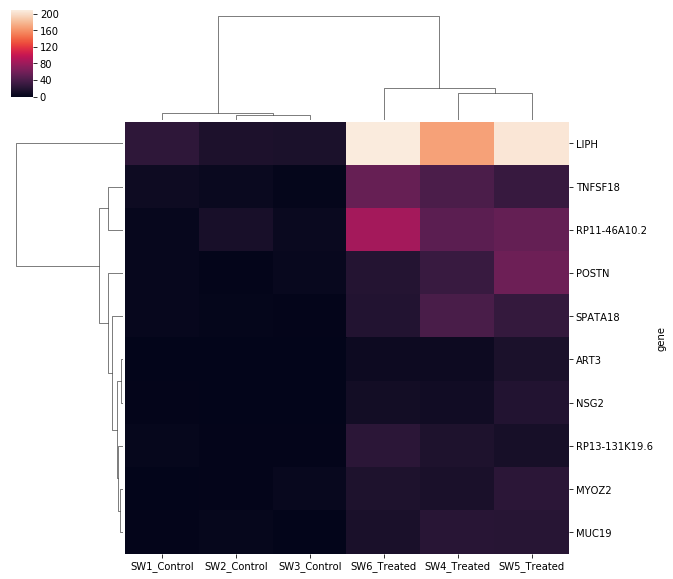

In [14]:
sns.clustermap(top_hits)
plt.show()
plt.close()

### Sometimes, we have to adjust things like the colors used

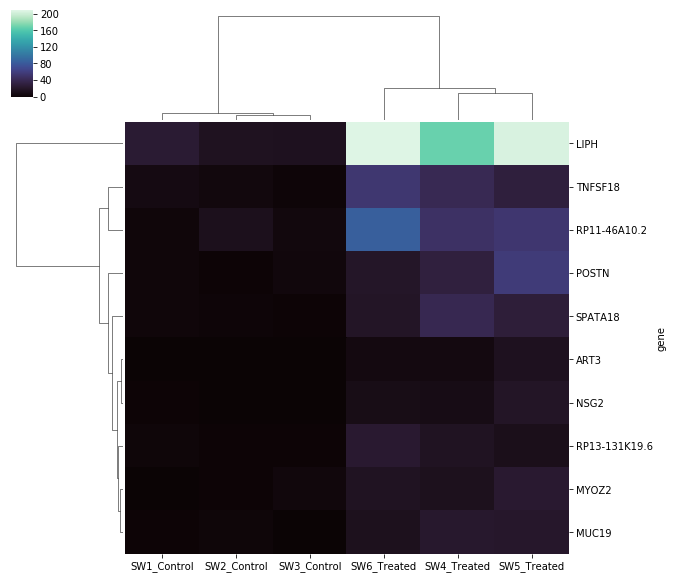

In [15]:
sns.clustermap(top_hits, cmap='mako')
plt.show()
plt.close()

### Adjustments might include log-scaling the data, so that the highly-expressed genes do not dominate as much.  

To perform a log-scale, we add a "pseudocount" of 1 to all values.  This prevents trying to take the logarithm of zero (which is undefined, but $\lim_{x \to 0}\log x = -\infty$), but does not drastically affect the qualitative nature of the data:

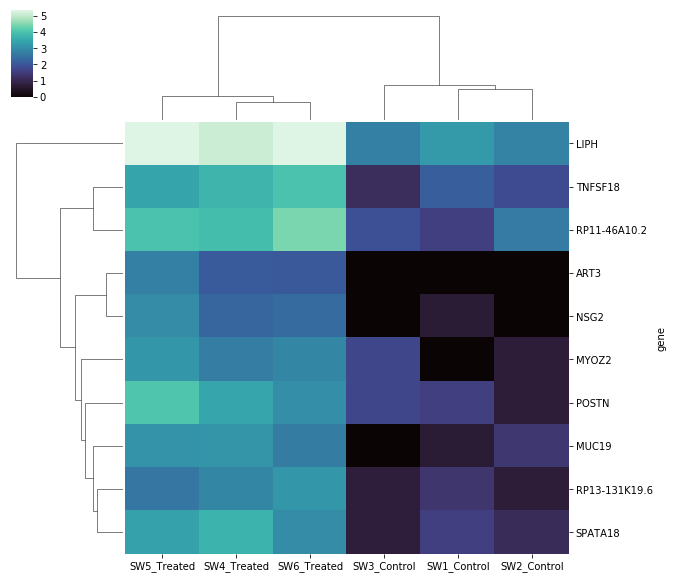

In [16]:
import numpy as np
sns.clustermap(np.log(top_hits+1), cmap='mako')
plt.show()
plt.close()

#### If you wanted to add more tweaks, you can usually find little pieces of code online.  Since there are so many things to possibly change, no one can remember all of them.

### Finally, let's run a principal component analysis (PCA)

#### PCA attempts to find which combinations of features/covariates in the data have the maximum variance.  By doing so, we are able to display a "compressed" version of the data which is simpler, but still retains the important information.  You will often see PCA described as a "dimensional reduction" technique.  A picture can help to illustrate.  

#### Below, we plot the expressions of 3 genes on a 3-D plot. Just as one can plot the $(x,y,z)$ coordinates, we plot the expressions for the 3 genes on separate axes. For genomic data, consider that we typically have >30,000 genes.  

#### Note, however, that in the picture the points all lie relatively close to that blue plane.  *Most* of the information in that plot can be captured by looking only at that plane-- even though the data is plotted in 3-D, it is *almost* 2-D.  We can imagine pushing all those points so they are lying on that plane; analysts would call this "projecting" the points onto the plane. Finally, we can imagine grabbing that plane, laying it flat, and looking at as a typical 2-D plot.    

![](3d_pca.png)

#### Furthermore, within that plane, most of the variation in the data is contained along the dashed diagonal line below.  If we rotate the x-y axis, we end up with the middle figure.  We can then compress the data to lie on that line (right-most figure).  In this way, we can "prune" variations that are not as important. Through this, we can highlight the most relevant information.  This process does lose information, but if done appropriately, we only discard minor details.   

#### Here, we demonstrated reduced three-dimensions to one, but we can often reduce >30,000 to only several (e.g. 2 or 3) and still retain meaningful information.  For genomic studies, PCA analyses typically uncover highly-expressed and differentially expressed genes.  If there are distinct differences in transcription, it is common to see the different conditions or phenotypes cluster in a way that is mutually exclusive.
![](2d_pca.png)


### We first import the necessary package:

Again, if you are new to this (or cannot remember), just search "Python PCA".  The first link is likely from the scikit-learn package.  At the bottom, there will be some examples.

In [17]:
from sklearn.decomposition import PCA

In [18]:
# This just "sets up" the PCA operation, telling it we want to ultimately compress the data down to 2-D:
pca = PCA(n_components=2)

# to run the dimension reduction, we use the "fit_transform" function
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA.fit_transform
# Note that, as above with the hierarchical clustering, fit_transform expects that the data has is transposed (i.e. each row of the table corresponds to a sample)
t = pca.fit_transform(expressions.T)
t

array([[-142261.78209937,   85815.46626557],
       [-191160.48471122,  -36434.46781938],
       [-202101.58810347,  -32921.22326539],
       [ 204656.07939663,   33473.10662247],
       [ 163804.43720438,  -25001.76782981],
       [ 167063.33831305,  -24931.11397346]])

### Note that the result is just a bunch of numbers (a numPy array), not a full-featured Pandas dataframe/table like we have been seeing and using.  Notably, there are no samples mentioned.  However, if you performed the PCA correctly, it should have dimension $(N, k)$ where $N$ is the number of samples, and $k$ is the final number of principal components (here $k=2$).  

#### We will need to add the sample information to interpret our plot.  Given the matrix (`expressions`) we input to the PCA, we know that the first 3 columns are "Control" and the final 3 are "Treated".  We will use that information when plotting the matrix above.

#### Beyond the numbers in the matrix above, it is helpful to provide the "explained variance", which helps more experienced data analysts when looking at the plot.  If the principal components contain a large percentage of the variance (typically >50%), then the PCA dimension reduction was relatively successful. If it is quite low, then the dimension reduction might be too aggressive and it is discarding important features in the data.  

#### Below, we extract the explained variance and multiply 100, since it is often expressed as a percentage:

In [19]:
explained_variance_pct = 100*pca.explained_variance_ratio_
explained_variance_pct

array([92.3890014 ,  5.77522661])

#### Finally, we plot.  Note that we plot the first 3 and final 3 samples separately, which results in different colors.  We also label the points and provide a legend.

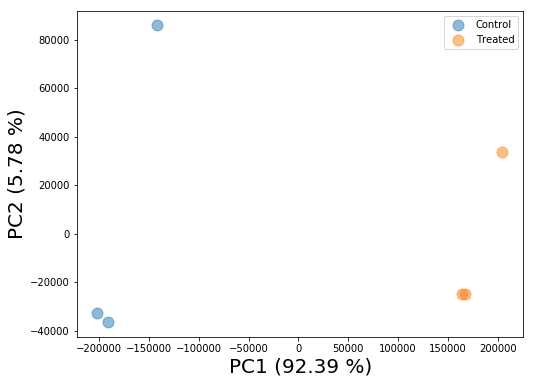

In [20]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.scatter(t[:3,0], t[:3,1], label='Control', s=120, alpha=0.5)
ax.scatter(t[3:,0], t[3:,1], label='Treated', s=120, alpha=0.5)
ax.legend()
ax.set_xlabel('PC1 (%.2f %%)' % explained_variance_pct[0], fontsize=20)
ax.set_ylabel('PC2 (%.2f %%)' % explained_variance_pct[1], fontsize=20)
plt.show()
plt.close()

#### We note that the orange and blue points are separated primarily along the first principal component (horizontal direction), which is where the bulk of the variance (92.39%) is contained.

#### Between the first two principal components, we captured 98% of the variance, which is *very* high.  This data was generated from a very aggressive treatment which caused very large transcriptome changes.  You will see similar PCA plots from knockout experiments, although the percentage of variance is typically a bit lower.  Since we have captured such a high percentage of variance, we can be fairly confident that the dimension reduction is not discarding too much important information.